# Szyfrowanie + kompresja
Najnowsza wersja sprawozdania jest dostępna pod adresem: [https://github.com/Gombek7/techniki-poufnosci/blob/main/Konfiguracja tunelu VPN/sprawozdanie.md](https://github.com/Gombek7/techniki-poufnosci/blob/main/Konfiguracja%20tunelu%20VPN/sprawozdanie.md)

Członkowie zespołu:
- Jarosław Dakowicz
- Piotr Kozioł
- Anton Maisiuk

## Instalacja środowiska

Sprawozdanie zostało napisane w notatniku Jupyter z użyciem jądra Deno, które pozwala na wykonywanie kodu w języku TypeScript zamiast w Pythonie.

Najpierw neleży zainstalować Deno. Należy uruchomić poniższą komendę w powershell.

```powershell
irm https://deno.land/install.ps1 | iex
```

Następnie, aby zainstalować jądro, należy użyć poniższej komendy.
```powershell
deno jupyter --install
```

Od teraz podczas edycji notatnika Jupyter w Visual Studio Code można wybrać jądro Deno.

## Zadanie 1 - własny algorytm szyfrowania/deszyfrowania

Wybrany algorytm to szyfr Cezara.

### Szyfrator i deszyfrator

Najpierw został zdefiniowany alfabet, czyli zestaw znaków obsługiwanych przez nasz algorytm.

In [2]:
const ALPHABET = "AĄBCĆDEĘFGHIJKLŁMNŃOÓPRSŚTUVWXYZŹŻaąbcćdeęfghijklłmnńoóprsśtuvwxyzźż\b\t\n\f\r !\"%'()*+,-.:?"
// const ALPHABET = "AĄBCĆDEĘFGHIJKLŁMNŃOÓPRSŚTUVWXYZŹŻaąbcćdeęfghijklłmnńoóprsśtuvwxyzźż\b\t\n\f\r !\"#$%&'()*+,-./0123456789:;<=>?@[\\]^`{|}~"

Następnie została napisana funkcja szyfrująca `encrypt`.

In [3]:
function encrypt(input: string, key: number): string
{
    const output: string[] = [];
    const n = ALPHABET.length; //liczba znaków w alfabecie
    for (const char of input) {
        const a = ALPHABET.indexOf(char); //indeks znaku do zaszyfrowania
        const c = (a + key) % n ;         //indeks zaszyfrowanego znaku
        output.push(ALPHABET[c]) ;        //zamiana indeksu na znak i wpisanie do wyjścia
    }
    return output.join("");
}

Funkcja deszyfrująca `decrypt` jest podobna, z tą różnicą, że klucz jest odejmowany od indeksu znaku.

In [4]:
function decrypt(input: string, key: number):string
{
    const output: string[] = []
    const n = ALPHABET.length //liczba znaków w alfabecie
    for(const letter of input)
    {
        const c = ALPHABET.indexOf(letter) //indeks zaszyfrowanego znaku
        const a = (c + n - key) % n        //indeks odszyfrowanego znaku
        output.push(ALPHABET.at(a))        //zamiana indeksu na znak i wpisanie do wyjścia
    }
    return output.join("")
}

Poniżej znajduje się krótki test szyfru. Podany tekst jest zaszyfrowywany losowym kluczem. Następnie odszyfrowywany prawidłowym i nieprawidłowym kluczem.

In [5]:
import { randomIntegerBetween } from 'jsr:@std/random';

const input = "Cześć! To jest tekst oryginalny!";
const key = randomIntegerBetween(0, 2 * ALPHABET.length);
const invalidKey = key + randomIntegerBetween(1, Math.ceil(ALPHABET.length / 2));

const encrypted = encrypt(input, key);
const decryptedInvalid = decrypt(encrypted, invalidKey);
const decryptedValid = decrypt(encrypted, key);

Deno.jupyter.md`| **Tekst oryginalny** | ${input} |
| --- | --- |
| Prawidłowy klucz | ${key} |
| Nieprawidłowy klucz | ${invalidKey} |
| **Tekst zaszyfrowany** | **${JSON.stringify(encrypted)}** |
| Tekst odszyfrowany z nieprawidłowym kluczem | ${decryptedInvalid} |
| **Tekst odszyfrowany z prawidłowym kluczem** | **${decryptedValid}** |
`

| **Tekst oryginalny** | Cześć! To jest tekst oryginalny! |
| --- | --- |
| Prawidłowy klucz | 36 |
| Nieprawidłowy klucz | 48 |
| **Tekst zaszyfrowany** | **"dL%Ę!SRvBR,%EFRF%-EFRBDK)+A\n.AKS"** |
| Tekst odszyfrowany z nieprawidłowym kluczem | (oWjUwvKęvaWikvkWąikvęhńZŻdRbdńw |
| **Tekst odszyfrowany z prawidłowym kluczem** | **Cześć! To jest tekst oryginalny!** |


## Łamanie metodą brute force

Przypuśćmy, że atakujący zna alfabet, w którym została napisana wiadomość. Może go uzyskać poprzez przechwycenie kilku zaszyfrowanych wiadomości. Atakujący może z łatwością znaleźć wszystkie możliwe odszyfrowane wiadomości, jednak problemem może być rozpoznanie prawidłowej wiadomości. Jednym ze sposobów jest sprawdzenie stopnia dopasowania częstości liter do języka, w którym została napisana wiadomość.

Częstości liter w tekście napisanym języku polskim jest nastepująca (źródło: [https://commons.wikimedia.org/wiki/File:Polish_letters_frequencies.svg](https://commons.wikimedia.org/wiki/File:Polish_letters_frequencies.svg)):

In [6]:
const letterFrequencies = {
    'a': 8.91,
    'ą': 0.99,
    'b': 1.47,
    'c': 3.96,
    'ć': 0.40,
    'd': 3.25,
    'e': 7.66,
    'ę': 1.11,
    'f': 0.30,
    'g': 1.42,
    'h': 1.08,
    'i': 8.21,
    'j': 2.28,
    'k': 3.51,
    'l': 2.10,
    'ł': 1.82,
    'm': 2.80,
    'n': 5.52,
    'ń': 0.20,
    'o': 7.75,
    'ó': 0.85,
    'p': 3.13,
    'r': 4.69,
    's': 4.32,
    'ś': 1.42,
    't': 3.98,
    'u': 2.50,
    'w': 4.65,
    'y': 3.76,
    'z': 5.64,
    'ź': 0.06,
    'ż': 0.83
  };

W kryptoanalizie przydatna będzie funkcja zliczająca częstość występowania liter w podanym tekście.

In [7]:
function getLetterFrequencies(text: string) {
    const output: Record<string, number> = {};
    for (const letter of text) {
        const lowerLetter = letter.toLowerCase();
        output[lowerLetter] = output[lowerLetter] ? output[lowerLetter] + 1 : 1;
    }
    const sum = Object.values(output).reduce((a,b) => a + b, 0);
    for (const letter of Object.keys(output)) {
        output[letter] = output[letter] * 100 / sum;
    }
    return output;
}

Konieczne będzie także znormalizowanie porównywanych częstotliwości tak, aby zawierały te same litery.

In [8]:
function normalizeFrequencies(frequencies1: Record<string, number>, frequencies2: Record<string, number>) {
    const lettersSet1 = new Set(Object.keys(frequencies1));
    const lettersSet2 = new Set(Object.keys(frequencies2));
    const commonLetters: Set<string> = lettersSet1.intersection(lettersSet2);

    let entries1 = Object.entries(frequencies1).filter(([key, value]) => commonLetters.has(key));
    const sum1 = entries1.reduce((a, b) => a + b[1], 0);
    entries1 = entries1.map(([key, value]) => ([key, value/sum1 * 100]))
    const result1 = Object.fromEntries(entries1);

    let entries2 = Object.entries(frequencies2).filter(([key, value]) => commonLetters.has(key));
    const sum2 = entries2.reduce((a, b) => a + b[1], 0);
    entries2 = entries2.map(([key, value]) => ([key, value/sum2 * 100]))
    const result2 = Object.fromEntries(entries2);

    return [result1, result2];
}

Do sprawdzenia w jakim stopniu rozkład częstości w próbie odpowiada rozkładowi oczekiwanemu można użyć testu zgodności chi-kwadrat. Im większa różnica, tym większa będzie wartość chi-kwadrat.

In [9]:
function chiSquaredTest(measuredFrequencies: Record<string, number>, expectedFrequencies: Record<string, number>) {
    let result = 0;
    Object.entries(measuredFrequencies).forEach(([letter, measuredValue]) => {
        const expectedValue = expectedFrequencies[letter];
        if (expectedValue == undefined) return;
        result += (((measuredValue - expectedValue) ** 2) / expectedValue);
    })
    return result
};

chiSquaredTest(getLetterFrequencies("W kryptoanalizie przydatna będzie funkcja zlicząjąca częstotliwość liter w podanym tekście."),letterFrequencies)

18.992119645432787

Teraz mamy wszystko, aby napisać funkcję łamiącą wiadomość metodą brute-force.

In [10]:
function crackBruteForce(encryptedText: string) {
    const t0 = performance.now()

    const crackedCandidates: string[] = [];
    for( let i=0; i < ALPHABET.length; i++) {
        crackedCandidates.push(decrypt(encryptedText, i))
    }

    const testResults = crackedCandidates.map(cracked => {
        const crackedLettersFrequencies = getLetterFrequencies(cracked);
        const [normalizedCrackedLettersFrequencies, normalizedLetterFrequencies] = normalizeFrequencies(crackedLettersFrequencies, letterFrequencies);
        return chiSquaredTest(normalizedCrackedLettersFrequencies, normalizedLetterFrequencies);
    })

    let min = testResults[0];
    let minIndex = 0;

    testResults.forEach((result, index) => {
        if (result < min) {
            min = result;
            minIndex = index;
        }
    })

    const t1 = performance.now()

    return {
        originalMessage: crackedCandidates[minIndex],
        key: minIndex,
        testResult: testResults[minIndex],
        time: t1 - t0,
    }
}

In [11]:
const input = `Ale muszę wam wytłumaczyć, jak narodziła się ta błędna koncepcja denuncjacji przyjemności i chwalebnego bólu, a ja dam wam kompletną relację z systemu i objaśnię prawdziwe nauki wielkiego odkrywcy prawdy, mistrza-budowniczego ludzkiego szczęścia. Nikt nie odrzuca, nie lubi lub unika przyjemności samej w sobie, ponieważ jest to przyjemność, ale dlatego, że ci, którzy nie wiedzą, jak dążyć do przyjemności, racjonalnie napotykają konsekwencje, które są niezwykle bolesne. I znowu nie ma kogoś, kto kocha lub dąży albo pragnie osiągnąć ból sam z siebie, ponieważ jest to ból, ale czasami pojawiają się okoliczności, w których trud i ból mogą przynieść mu wielką przyjemność. Aby wziąć trywialny przykład, który z nas kiedykolwiek podejmuje żmudne ćwiczenia fizyczne, z wyjątkiem uzyskania jakiejś korzyści z tego? Ale kto ma prawo do popełnienia błędu u człowieka, który decyduje się cieszyć się przyjemnością, która nie ma denerwujących konsekwencji, lub tym, który unika bólu, który nie przynosi oczekiwanej przyjemności?
Z drugiej strony, p`;

crackBruteForce(encrypt(input, 55));

{
  originalMessage: "Ale muszę wam wytłumaczyć, jak narodziła się ta błędna koncepcja denuncjacji przyjemności i chwalebnego bólu, a ja dam wam kompletną relację z systemu i objaśnię prawdziwe nauki wielkiego odkrywcy prawdy, mistrza-budowniczego ludzkiego szczęścia. Nikt nie odrzuca, nie lubi lub unika przyjemności samej w sobie, ponieważ jest to przyjemność, ale dlatego, że ci, którzy nie wiedzą, jak dążyć do przyjemności, racjonalnie napotykają konsekwencje, które są niezwykle bolesne. I znowu nie ma kogoś, kto kocha lub dąży albo pragnie osiągnąć ból sam z siebie, ponieważ jest to ból, ale czasami pojawiają się okoliczności, w których trud i ból mogą przynieść mu wielką przyjemność. Aby wziąć trywialny przykład, który z nas kiedykolwiek podejmuje żmudne ćwiczenia fizyczne, z wyjątkiem uzyskania jakiejś korzyści z tego? Ale kto ma prawo do popełnienia błędu u człowieka, który decyduje się cieszyć się przyjemnością, która nie ma denerwujących konsekwencji, lub tym, który unika bólu,

### Badanie zależności czasu łamania od parametrów szyratora

Napisany system łamania klucza sprawdza wszystkie możliwe klucze i wybiera najbardziej prawdopodobną odpowiedź. Dlatego niezależnie od klucza, czas łamania będzie taki sam. W zamian zostanie zbadany czas i trafność wyników w zależności od długości wiadomości.

Zdefniujmy 5 dłuższych tekstów i sprawdźmy rezultaty dla różnych długości wiadomości.

In [12]:
const messages = [
    'Litwo! Ojczyzno moja! ty jesteś jak zdrowie. Ile cię trzeba cenić, ten tylko się dowie, Kto cię stracił. Dziś piękność twą w całej ozdobie Widzę i opisuję, bo tęsknię po tobie. Panno Święta, co Jasnej bronisz Częstochowy I w Ostrej świecisz Bramie! Ty, co gród zamkowy Nowogródzki ochraniasz z jego wiernym ludem! Jak mnie dziecko do zdrowia powróciłaś cudem (Gdy od płaczącej matki pod Twoję opiekę Ofiarowany, martwą podniosłem powiekę I zaraz mogłem pieszo do Twych świątyń progu Iść za wrócone ży',
    "Ale muszę wam wytłumaczyć, jak narodziła się ta błędna koncepcja denuncjacji przyjemności i chwalebnego bólu, a ja dam wam kompletną relację z systemu i objaśnię prawdziwe nauki wielkiego odkrywcy prawdy, mistrza-budowniczego ludzkiego szczęścia. Nikt nie odrzuca, nie lubi lub unika przyjemności samej w sobie, ponieważ jest to przyjemność, ale dlatego, że ci, którzy nie wiedzą, jak dążyć do przyjemności, racjonalnie napotykają konsekwencje, które są niezwykle bolesne. I znowu nie ma kogoś, kto k",
    "Kocha lub dąży albo pragnie osiągnąć ból sam z siebie, ponieważ jest to ból, ale czasami pojawiają się okoliczności, w których trud i ból mogą przynieść mu wielką przyjemność. Aby wziąć trywialny przykład, który z nas kiedykolwiek podejmuje żmudne ćwiczenia fizyczne, z wyjątkiem uzyskania jakiejś korzyści z tego? Ale kto ma prawo do popełnienia błędu u człowieka, który decyduje się cieszyć się przyjemnością, która nie ma denerwujących konsekwencji, lub tym, który unika bólu, który nie przynosi o",
    "Z drugiej strony, potępiamy z prawym oburzeniem i niechęcią ludzi, którzy są tak zniewoleni i zdemoralizowani urokami przyjemności chwili, tak zaślepieni pożądaniem, że nie mogą przewidzieć bólu i kłopotów, które są związane; a jednakowa wina należy do tych, którzy zawodzą w swoich obowiązkach przez słabość woli, która jest tym samym, co mówienie przez kurczenie się od trudów i bólu. Te przypadki są całkowicie proste i łatwe do rozróżnienia. W wolnej godzinie, kiedy nasza moc wyboru jest nieskrę",
    "Nieskrępowana i gdy nic nie stoi na przeszkodzie, abyśmy mogli robić to, co lubimy najbardziej, każda przyjemność powinna być przyjmowana z zadowoleniem, a każdy ból unikany. Jednak w pewnych okolicznościach i z powodu roszczeń wynikających z obowiązków lub obowiązków biznesowych, często zdarza się, że przyjemności muszą zostać odrzucone, a uciążliwości zaakceptowane. Mądry człowiek zatem zawsze trzyma się w tych sprawach tej zasady selekcji: odrzuca przyjemności, aby zabezpieczyć inne, większe "

]

const lengths = [5, 10, 20, 30, 40, 50, 70, 100, 200, 300, 400, 500]
const encrytpionKey = 15;

const results = Object.fromEntries(lengths.map((n => ([n, messages.map(message => crackBruteForce(encrypt(message.substring(0, n), encrytpionKey)))]))));

Poniżej zotanie narysowany wykres ze wskaźnikiem skuteczności w zależności od długości wiadomości.

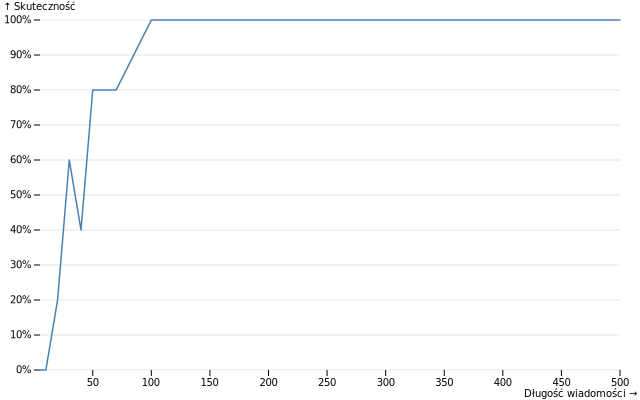

In [21]:

import { document, penguins } from "jsr:@ry/jupyter-helper";
import * as Plot from "npm:@observablehq/plot"

const successRates = Object.entries(results).map(([key, results]) => {
    const successesCount = results.reduce((acc, result) => result.key === encrytpionKey ? acc + 1 : acc, 0);
    const successRate = (successesCount / results.length) * 100;
    return {
        "Długość wiadomości": parseInt(key),
        "Skuteczność": successRate
    };
})

await Deno.jupyter.display(
    Plot.plot({
        document,
        style: {
            color: 'black'
        },
        y: { grid: true, tickFormat: n => `${n}%`},
        marks: [Plot.line(successRates, { x: "Długość wiadomości", y: "Skuteczność", stroke: "steelblue"})]
    })
)

Już przy 100 znakach wszyzstkie wiadomości zostały poprawnie odszyfrowane. Dla krótszych wiadomości można posortować rezultaty od najbardziej prawdopodobnych wiadomości i dokonać wyboru ręcznie lub użyć modelu językowego.

Poniżej zotanie narysowany średni czas łamania klucza w zależności od długości wiadomości.

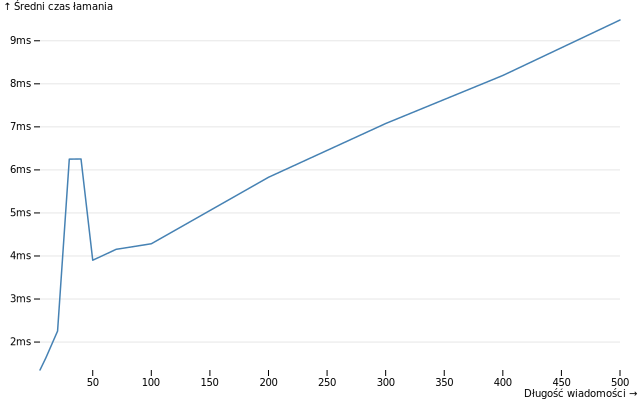

In [24]:

import { document, penguins } from "jsr:@ry/jupyter-helper";
import * as Plot from "npm:@observablehq/plot"

const crackTimes = Object.entries(results).map(([key, results]) => {
    const crackTimeSum = results.reduce((acc, result) => acc + result.time, 0);
    const crackTimeAvg = (crackTimeSum / results.length);
    return {
        "Długość wiadomości": parseInt(key),
        "Średni czas łamania": crackTimeAvg
    };
})

await Deno.jupyter.display(
    Plot.plot({
        document,
        style: {
            color: 'black'
        },
        y: { grid: true, tickFormat: n => `${n}ms`},
        marks: [Plot.line(crackTimes, { x: "Długość wiadomości", y: "Średni czas łamania", stroke: "steelblue"})]
    })
)

Od długości 50 znaków czas łamania rośnie liniowo, choć są to wciąż bardzo małe wartości. W praktyce nie warto analizować tak długich wiadomości w całości. W analizowanych przypadkach system osiągnął stuprocentową skuteczność już przy 100 znakach. Dla pewności możemy analizować np. 200 pierwszych znaków szyfrogramu.

## Zadanie 2 - zabezpieczanie danych z wykorzystaniem ZIP

### Zapoznaj się z narzędziem John the Ripper

Instalacja John the Ripper

Windows - https://www.openwall.com/john/ -> Download 1.9.0-jumbo-1 64-bit Windows 7z lub zip -> Wypakować

Linux - sudo apt install john

### Zbadaj możliwości odzyskiwania hasła z szyfrowanego archiwum za pomocą podanego narzędzia

* Stworzenie pliku txt
* Archiwizacja pliku z hasłem "a$9" 
* Obliczenie hash komendą - zip2john file.zip > hash
* Próba odzyskania hasła komendą - john hash

![img](johntest.png)


### Oceń czas w zależności od mocy i długości hasła oraz od typu i ilości danych

#### Przygotowanie danych

Do badań przygotowano następujące dane testowe:
* Plik tekstowy zawierający jeden paragraf *lorem lipsum*

* Folder zawierający pliki tekstowe o łącznym rozmiarze 80MB
* Folder zawierający pliki jpg o łącznym rozmiarze 80MB
* Folder zawierający pliki mp4 *Lorem Lipsum* o łącznym rozmiarze 80MB

* Folder zawierający pliki tekstowe o łącznym rozmiarze 470MB
* Folder zawierający pliki jpg o łącznym rozmiarze 470MB
* Folder zawierający pliki mp4 o łącznym rozmiarze 470MB

#### Próba odzyskania hasła

Jeden paragraf *lore lipsum* zaszyfrowany w trzy inne archiwa z hasłami
* bTa - > 1s
* o9A - > 1s
* (b2 - > 2m 17m (z ograniczeniem długości hasła od 3 do 4 znaków)
* 9$B - > 10m 17s (z ograniczeniem długości hasła od 3 do 5 znaków)

80MB danych z hasłem (password) (z ograniczeniem długości hasła od 3 do 4 znaków)
* Lore lipsum (b1A5) - 6s 
* Pictures (74Pa) - 24s 
* Video (94Ar) - 18s

490MB danych z hasłem (password) (z ograniczeniem długości hasła od 3 do 4 znaków)
* Lore lipsum (6o8A) - 6s 
* Pictures (Ka91) - 8s
* Video (09zt)- 8s 

### Wnioski

#### Wpływ długości i złożoności hasła
Są to główne czynniki wpływające na czas odzyskania hasła. Dodanie nawet jednego dodatkowego znaku może znacząco wydłużyć czas trwania programu. To samo tyczy się używania znaków specjalnych w haśle.

#### Wpływ rozmiaru i typu plików na czas odzyskiwania
Różnice zaobserwowane przy innych typach lub rozmiarach plików można przypisać złożoności hasła oraz sposobowi, w jaki algorytm sprawdza kolejne możliwości. W takim przypadku nie byłoby znaczącej różnicy między typami plików a rozmiarem danych. Na podstawie tak małego zbioru danych oraz niejednoznacznych wyników nie jesteśmy w stanie stwierdzić, czy rozmiar i typ danych wpływają na czas odzyskiwania danych.